## Predictive Analysis

### Data Preprocessing

#### Read Housing Price of NY and CA region

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ny_ca_price/2019-08-ny.txt", sep=" ", header=None).iloc[:, [0, 8]].T
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
# print(df)

In [4]:
# load and clean ny county price df
import os
df_all = list()
filelist = sorted(os.listdir('ny_ca_price'))
for file in filelist:
  if file.endswith('.txt'):
    file_name = os.path.join('ny_ca_price', file)
  
    df = pd.read_csv(file_name, sep=" ", header=None).iloc[:, [0, 8]].T
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header
    df_all.append(df)
ny_all = pd.concat(df_all, ignore_index=True)
need_to_drop = list()
for col in ny_all:
  if '--' in set(ny_all[col]):
    need_to_drop.append(col)
ny_all.drop(columns=need_to_drop, axis=1, inplace=True)

In [5]:
ca_input = pd.read_csv('ny_ca_price/ca_county_sfh_price - Sheet1.csv')
ca_all = ca_input.iloc[:,2:]
label_name = ca_input.iloc[:,0]

In [6]:
time_period = ["2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03","2021-04","2021-05","2021-06","2021-07","2021-08","2021-09","2021-10","2021-11","2021-12","2022-01","2022-02","2022-03","2022-04","2022-05","2022-06"]
ny_all['Time'] = time_period
ca_all['Time'] = time_period

In [7]:
# ny_all['Time'] = pd.to_datetime(ny_all['Time'],format='%Y-%m')
ny_all.head()

,Allegany,Bronx,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,Clinton,Columbia,...,Suffolk,Sullivan,Tioga,Tompkins,Ulster,Warren,Wayne,Wyoming,Yates,Time
0,"$93,500","$400,000","$132,500","$108,000","$121,700","$115,250","$118,279","$120,750","$150,000","$247,000",...,"$414,000","$133,750","$149,485","$230,750","$260,000","$205,000","$159,000","$136,435","$222,000",2019-08
1,"$112,000","$430,000","$125,000","$110,000","$137,800","$133,000","$128,000","$112,240","$154,950","$305,000",...,"$410,000","$150,000","$133,500","$237,000","$258,750","$207,000","$134,620","$143,716","$160,460",2019-09
2,"$95,000","$365,000","$112,250","$104,850","$149,250","$121,500","$100,000","$115,000","$139,500","$309,000",...,"$408,000","$125,000","$114,750","$237,000","$249,100","$198,500","$164,950","$88,950","$153,950",2019-10
3,"$120,450","$420,000","$120,936","$115,000","$145,640","$105,000","$115,500","$125,000","$151,700","$280,000",...,"$400,000","$140,000","$120,000","$197,630","$250,000","$217,500","$138,450","$126,000","$257,500",2019-11
4,"$84,000","$385,000","$114,925","$90,000","$131,675","$106,000","$152,500","$88,649","$157,000","$254,000",...,"$415,000","$173,500","$113,000","$231,750","$259,000","$224,700","$146,094","$112,500","$199,000",2019-12


#### Read Covid-Related Data

In [9]:
vacc_all = pd.read_csv("COVID-19_Vaccinations.csv")
vacc_all.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,08/03/2022,54025,31,Greenbrier County,WV,97.2,21686.0,62.6,21644.0,65.8,...,7.0,8.0,8.0,7.0,34662.0,32879.0,4979.0,30238.0,27900.0,8136.0
1,08/03/2022,17043,31,DuPage County,IL,98.3,776606.0,84.1,771299.0,88.7,...,4.0,4.0,4.0,4.0,922921.0,869134.0,153791.0,789146.0,715343.0,148998.0
2,08/03/2022,01017,31,Chambers County,AL,92.5,12875.0,38.7,12867.0,41.0,...,6.0,6.0,7.0,6.0,33254.0,31372.0,5031.0,28624.0,26341.0,6715.0
3,08/03/2022,36007,31,Broome County,NY,97.6,132779.0,69.7,132528.0,73.4,...,4.0,4.0,4.0,3.0,190488.0,180602.0,26919.0,166375.0,153683.0,36980.0
4,08/03/2022,16023,31,Butte County,ID,97.7,1424.0,54.8,1424.0,58.1,...,2.0,3.0,3.0,2.0,2597.0,2450.0,484.0,2204.0,1966.0,614.0


In [10]:
ny_vacc = vacc_all[vacc_all.Recip_State == 'NY']
# ny_vacc

In [11]:
ca_vacc = vacc_all[vacc_all.Recip_State == 'CA']
# ca_vacc

In [12]:
ny_vacc['Date'] = pd.to_datetime(ny_vacc['Date'])
ca_vacc['Date'] = pd.to_datetime(ca_vacc['Date'])

### Select the end of month data for each county

In [13]:
ny_vacc_month = ny_vacc[ny_vacc.Date.dt.is_month_end]
ny_vacc_month

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
75618,2022-05-31,36117,22,Wayne County,NY,97.6,59995.0,66.7,59993.0,70.6,...,4.0,4.0,4.0,4.0,89918.0,84952.0,14130.0,77490.0,70822.0,17552.0
75673,2022-05-31,36007,22,Broome County,NY,97.6,131711.0,69.1,131701.0,72.9,...,4.0,4.0,4.0,3.0,190488.0,180602.0,26919.0,166375.0,153683.0,36980.0
75679,2022-05-31,36011,22,Cayuga County,NY,97.6,48413.0,63.2,48409.0,66.5,...,8.0,8.0,8.0,7.0,76576.0,72746.0,11071.0,66963.0,61675.0,15189.0
75785,2022-05-31,36013,22,Chautauqua County,NY,97.6,84197.0,66.3,84194.0,70.2,...,8.0,8.0,8.0,7.0,126903.0,120007.0,18733.0,110272.0,101274.0,26285.0
75800,2022-05-31,36073,22,Orleans County,NY,97.6,23760.0,58.9,23760.0,62.0,...,4.0,4.0,4.0,3.0,40352.0,38326.0,5771.0,35381.0,32555.0,7434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772434,2020-12-31,36001,53,Albany County,NY,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,305506.0,NaN,NaN,268701.0,249741.0,NaN
1772467,2020-12-31,36043,53,Herkimer County,NY,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,61319.0,NaN,NaN,53364.0,48793.0,NaN
1772499,2020-12-31,36099,53,Seneca County,NY,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,34016.0,NaN,NaN,29658.0,27227.0,NaN
1772550,2020-12-31,36071,53,Orange County,NY,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,384940.0,NaN,NaN,321416.0,286940.0,NaN


In [14]:
ca_vacc_month = ca_vacc[ca_vacc.Date.dt.is_month_end]
ca_vacc_month

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
75577,2022-05-31,06067,22,Sacramento County,CA,97.6,1152130.0,74.2,1150607.0,79.1,...,4.0,4.0,4.0,3.0,1552058.0,1453906.0,264969.0,1311808.0,1188937.0,224882.0
75613,2022-05-31,06045,22,Mendocino County,CA,97.6,66066.0,76.2,66006.0,80.7,...,8.0,8.0,8.0,7.0,86749.0,81800.0,13370.0,74605.0,68430.0,20025.0
75631,2022-05-31,06105,22,Trinity County,CA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12285.0,11717.0,1563.0,10920.0,10154.0,3475.0
75698,2022-05-31,06015,22,Del Norte County,CA,97.6,13876.0,49.9,13865.0,52.6,...,8.0,8.0,8.0,7.0,27812.0,26363.0,4373.0,23994.0,21990.0,5123.0
75742,2022-05-31,06091,22,Sierra County,CA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3005.0,2867.0,358.0,2684.0,2509.0,963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772373,2020-12-31,06075,53,San Francisco County,CA,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,881549.0,NaN,NaN,798043.0,763379.0,NaN
1772441,2020-12-31,06013,53,Contra Costa County,CA,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1153526.0,NaN,NaN,988404.0,894879.0,NaN
1772453,2020-12-31,06091,53,Sierra County,CA,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,3005.0,NaN,NaN,2684.0,2509.0,NaN
1772531,2020-12-31,06019,53,Fresno County,CA,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,999101.0,NaN,NaN,810168.0,717248.0,NaN


In [15]:
ca_vacc_month['Date'] = ca_vacc_month.Date.dt.strftime('%Y-%m')

In [16]:
ny_vacc_month['Date'] = ny_vacc_month.Date.dt.strftime('%Y-%m')

### Merge housing price and vaccination data together

In [17]:
ca_all.set_index("Time", inplace = True)

In [18]:
ca_all.columns
# print(len(ca_all.index))
ca_all_df = pd.DataFrame()

for i in range(len(ca_all.columns)):
    curr = pd.DataFrame([ca_all.columns[i]+ ' County' for x in range(len(ca_all.index))],index = ca_all.index,columns =['Location'])
    curr['Price'] = [ca_all.iloc[x,i] for x in range(len(ca_all.index))]
    ca_all_df = pd.concat([curr, ca_all_df])

ca_all_df = ca_all_df.reset_index().rename(columns ={'Time':'Date'})
ca_vacc = ca_vacc_month.rename(columns={'Recip_County':'Location'})
ca_merged = pd.merge(ca_all_df,ca_vacc, on =['Date','Location'], how= 'right')

# Find NaN value of Housing price 
ca_merged[ca_merged['Price'].isna()]
len(ca_merged)

1062

In [19]:
ca_merged.dropna(subset=['Price'], inplace=True)
ca_merged

,Date,Location,Price,FIPS,MMWR_week,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,2022-05,Sacramento County,"$580,000",06067,22,CA,97.6,1152130.0,74.2,1150607.0,...,4.0,4.0,4.0,3.0,1552058.0,1453906.0,264969.0,1311808.0,1188937.0,224882.0
1,2022-05,Mendocino County,"$597,500",06045,22,CA,97.6,66066.0,76.2,66006.0,...,8.0,8.0,8.0,7.0,86749.0,81800.0,13370.0,74605.0,68430.0,20025.0
3,2022-05,Del Norte County,"$320,000",06015,22,CA,97.6,13876.0,49.9,13865.0,...,8.0,8.0,8.0,7.0,27812.0,26363.0,4373.0,23994.0,21990.0,5123.0
5,2022-05,Santa Clara County,"$1,927,500",06085,22,CA,97.6,1818824.0,94.3,1815728.0,...,4.0,4.0,4.0,4.0,1927852.0,1815986.0,304049.0,1654855.0,1511937.0,268207.0
6,2022-05,Butte County,"$500,000",06007,22,CA,97.6,129729.0,59.2,129659.0,...,4.0,4.0,4.0,3.0,219186.0,207124.0,32331.0,189828.0,174793.0,40228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,2020-12,San Joaquin County,"$435,750",06077,53,CA,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,762148.0,NaN,NaN,628553.0,557577.0,NaN
1055,2020-12,Humboldt County,"$370,000",06023,53,CA,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,135558.0,NaN,NaN,118607.0,109924.0,NaN
1057,2020-12,San Francisco County,"$1,581,000",06075,53,CA,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,881549.0,NaN,NaN,798043.0,763379.0,NaN
1060,2020-12,Fresno County,"$325,500",06019,53,CA,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,999101.0,NaN,NaN,810168.0,717248.0,NaN


In [20]:
ny_all.set_index("Time", inplace = True)

In [21]:
ny_all.columns
# print(len(ny_all.index))
ny_all_df = pd.DataFrame()

for i in range(len(ny_all.columns)):
    curr = pd.DataFrame([ny_all.columns[i]+ ' County' for x in range(len(ny_all.index))],index = ny_all.index,columns =['Location'])
    curr['Price'] = [ny_all.iloc[x,i] for x in range(len(ny_all.index))]
    ny_all_df = pd.concat([curr, ny_all_df])

ny_all_df = ny_all_df.reset_index().rename(columns ={'Time':'Date'})
ny_vacc = ny_vacc_month.rename(columns={'Recip_County':'Location'})
ny_merged = pd.merge(ny_all_df,ny_vacc, on =['Date','Location'], how= 'right')

# Find NaN value of Housing price 
ny_merged[ny_merged['Price'].isna()]

,Date,Location,Price,FIPS,MMWR_week,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,...,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
13,2022-05,Saratoga County,NaN,36091,22,NY,97.6,203245.0,88.4,203211.0,...,4.0,4.0,4.0,3.0,229863.0,218464.0,33813.0,200700.0,184651.0,43232.0
15,2022-05,Fulton County,NaN,36035,22,NY,97.6,31599.0,59.2,31594.0,...,8.0,8.0,8.0,7.0,53383.0,50698.0,8065.0,46437.0,42633.0,10752.0
21,2022-05,Rensselaer County,NaN,36083,22,NY,97.6,124770.0,78.6,124734.0,...,4.0,4.0,4.0,3.0,158714.0,150669.0,22594.0,138560.0,128075.0,27805.0
32,2022-05,Schoharie County,NaN,36095,22,NY,97.6,19071.0,61.5,19070.0,...,4.0,4.0,4.0,3.0,30999.0,29740.0,4112.0,27563.0,25628.0,7047.0
36,2022-05,Schenectady County,NaN,36093,22,NY,97.6,125458.0,80.8,125437.0,...,4.0,4.0,4.0,4.0,155299.0,146118.0,24332.0,133217.0,121786.0,26943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,2020-12,Rensselaer County,NaN,36083,53,NY,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,158714.0,NaN,NaN,138560.0,128075.0,NaN
1121,2020-12,Schoharie County,NaN,36095,53,NY,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,30999.0,NaN,NaN,27563.0,25628.0,NaN
1122,2020-12,Putnam County,NaN,36079,53,NY,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,98320.0,NaN,NaN,86735.0,79205.0,NaN
1129,2020-12,Albany County,NaN,36001,53,NY,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,305506.0,NaN,NaN,268701.0,249741.0,NaN


In [22]:
ny_merged.dropna(subset=['Price'], inplace=True)
# ny_merged

### Data Understanding and Exploring

For the 69 features we have, after screening all the column description, we believe the following columns that might not useful in our analysis: 
1.FIPS:Federal Information Processing Standards code
2.MMWR_week: The week of the epidemiologic year as defined by the Morbidity and Mortality Weekly Report
3.Recip_State: State
4.Others: For the vaccination data, the dataset provide the age range 5+, 12+, 18+, 65+. After discussed, we believe that 18+ would provide a more meaningful insight to the housing prices compared to other features, so we only keep the 18+ related features and drop others. 

In [23]:
drop_columns = ['FIPS','MMWR_week','Recip_State',
                'Administered_Dose1_Recip_5Plus',
                'Administered_Dose1_Recip_5PlusPop_Pct',
                'Administered_Dose1_Recip_12Plus',
                'Administered_Dose1_Recip_12PlusPop_Pct',
                'Administered_Dose1_Recip_65Plus',
                'Administered_Dose1_Recip_65PlusPop_Pct',
                'Administered_Dose1_Recip', 
                'Administered_Dose1_Pop_Pct',
                'Administered_Dose1_Recip_18Plus',
                'Administered_Dose1_Recip_18PlusPop_Pct',
                'Series_Complete_5Plus',
                'Series_Complete_5PlusPop_Pct',
                'Series_Complete_5to17',
                'Series_Complete_5to17Pop_Pct', 
                'Series_Complete_12Plus',
                'Series_Complete_12PlusPop_Pct',
                'Series_Complete_65Plus',
                'Series_Complete_65PlusPop_Pct',
                'Series_Complete_Pop_Pct_SVI', 
                'Series_Complete_18PlusPop_Pct_SVI',
                'Booster_Doses_5Plus',
                'Booster_Doses_5Plus_Vax_Pct', 
                'Booster_Doses_12Plus',
                'Booster_Doses_12Plus_Vax_Pct',
                'Booster_Doses_50Plus',
                'Booster_Doses_50Plus_Vax_Pct', 
                'Booster_Doses_65Plus',
                'Booster_Doses_65Plus_Vax_Pct',
                'Series_Complete_5PlusPop_Pct_SVI',
                'Series_Complete_5to17Pop_Pct_SVI', 
                'Series_Complete_12PlusPop_Pct_SVI',
                'Series_Complete_65PlusPop_Pct_SVI',
                'Series_Complete_5PlusPop_Pct_UR_Equity',
                'Series_Complete_5to17Pop_Pct_UR_Equity',
                'Series_Complete_12PlusPop_Pct_UR_Equity',
                'Series_Complete_65PlusPop_Pct_UR_Equity', 
                'Series_Complete_Pop_Pct_UR_Equity',
                'Series_Complete_18PlusPop_Pct_UR_Equity', 
                'Booster_Doses_Vax_Pct_SVI',
                'Booster_Doses_18PlusVax_Pct_SVI',
                'Booster_Doses_18PlusVax_Pct_UR_Equity',
                'Booster_Doses_12PlusVax_Pct_SVI', 
                'Booster_Doses_65PlusVax_Pct_SVI', 'Booster_Doses_Vax_Pct_UR_Equity',
                'Booster_Doses_12PlusVax_Pct_UR_Equity','Booster_Doses_65PlusVax_Pct_UR_Equity', 
                'Census2019_5PlusPop', 'Census2019_5to17Pop', 'Census2019_12PlusPop',
                'Census2019_65PlusPop','Census2019', 'Census2019_18PlusPop']

In [24]:
ny_merged.drop(drop_columns, axis=1, inplace=True)
# ny_merged

In [25]:
ca_merged.drop(drop_columns, axis=1, inplace=True)
# ca_merged

In [26]:
ny_merged.columns

Index(['Date', 'Location', 'Price', 'Completeness_pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_18Plus',
       'Booster_Doses_18Plus_Vax_Pct', 'SVI_CTGY', 'Metro_status'],
      dtype='object')

In [25]:
ny_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 1133
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           864 non-null    object 
 1   Location                       864 non-null    object 
 2   Price                          864 non-null    object 
 3   Completeness_pct               864 non-null    float64
 4   Series_Complete_Yes            864 non-null    float64
 5   Series_Complete_Pop_Pct        864 non-null    float64
 6   Series_Complete_18Plus         864 non-null    float64
 7   Series_Complete_18PlusPop_Pct  864 non-null    float64
 8   Booster_Doses                  288 non-null    float64
 9   Booster_Doses_Vax_Pct          288 non-null    float64
 10  Booster_Doses_18Plus           288 non-null    float64
 11  Booster_Doses_18Plus_Vax_Pct   288 non-null    float64
 12  SVI_CTGY                       864 non-null    ob

Convert "Housing price" to int type 

In [27]:
ny_merged['Price'] = ny_merged['Price'].replace('[\$,]', '', regex=True).astype(int)
# ny_merged

In [28]:
ca_merged['Price'] = ca_merged['Price'].replace('[\$,]', '', regex=True).astype(int)
# ca_merged

### Understanding of Different Feature 

1. Metro_Status: 
Metro vs. non-metro classification type is an aggregation of the six National Center for Health Statistics (NCHS) Urban-Rural Classification Scheme for Counties.
        - “Metro” counties include Large Central Metropolitan, Large Fringe Metropolitan, Medium Metropolitan,
             and Small Metropolitan classifications.
        - “Non-Metro” counties include Micropolitan and Non-Core (Rural) classifications.

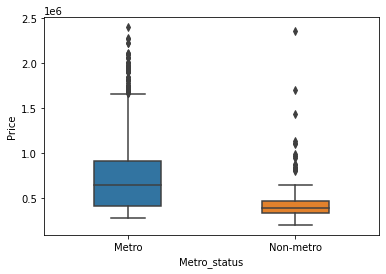

In [29]:
sns.boxplot("Metro_status", "Price", width=0.4, data=ca_merged)
plt.show()

2. SVI_CTGY: CDC Social Vulnerability Index (SVI) rank categorization where:
        - A = 0–0.25 SVI rank
        - B = 0.2501–0.50 SVI rank
        - C = 0.5001–0.75 SVI rank
        - D = 0.7501–1.0 SVI rank

### Converting the data

In [30]:
# 1. Convert "Metro_status" to model undertandable for NY
ny_merged['Metro_status'] = np.where(ny_merged['Metro_status']=='Metro',1,0)
# ny_merged

In [31]:
# 2. Convert "Metro_status" to model undertandable for CA
ca_merged['Metro_status'] = np.where(ca_merged['Metro_status']=='Metro',1,0)
# ca_merged

In [33]:
# 3. Convert "SVI_CTGY" to model undertandable for NY
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ny_merged['SVI_CTGY'] = le.fit_transform(ny_merged['SVI_CTGY'])
ny_merged['SVI_CTGY'] = le.fit_transform(ny_merged['SVI_CTGY'])
ny_merged.head()

,Date,Location,Price,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,SVI_CTGY,Metro_status
0,2022-05,Wayne County,200000,97.6,56658.0,63.0,50790.0,71.7,33565.0,59.2,32346.0,63.7,1,1
1,2022-05,Broome County,169000,97.6,121961.0,64.0,110823.0,72.1,69009.0,56.6,66973.0,60.4,2,1
2,2022-05,Cayuga County,171450,97.6,45566.0,59.5,41183.0,66.8,26167.0,57.4,25201.0,61.2,2,0
3,2022-05,Chautauqua County,151750,97.6,75910.0,59.8,68836.0,68.0,41061.0,54.1,39765.0,57.8,2,0
4,2022-05,Orleans County,140000,97.6,22329.0,55.3,20607.0,63.3,11159.0,50.0,10858.0,52.7,2,1


In [32]:
ny_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 1133
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           864 non-null    object 
 1   Location                       864 non-null    object 
 2   Price                          864 non-null    int64  
 3   Completeness_pct               864 non-null    float64
 4   Series_Complete_Yes            864 non-null    float64
 5   Series_Complete_Pop_Pct        864 non-null    float64
 6   Series_Complete_18Plus         864 non-null    float64
 7   Series_Complete_18PlusPop_Pct  864 non-null    float64
 8   Booster_Doses                  288 non-null    float64
 9   Booster_Doses_Vax_Pct          288 non-null    float64
 10  Booster_Doses_18Plus           288 non-null    float64
 11  Booster_Doses_18Plus_Vax_Pct   288 non-null    float64
 12  SVI_CTGY                       864 non-null    in

In [34]:
# 4. Convert "SVI_CTGY" to model undertandable for CA
ca_merged['SVI_CTGY'] = le.fit_transform(ca_merged['SVI_CTGY'])
ca_merged['SVI_CTGY'] = le.fit_transform(ca_merged['SVI_CTGY'])
ca_merged.head()

,Date,Location,Price,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,SVI_CTGY,Metro_status
0,2022-05,Sacramento County,580000,97.6,1057537.0,68.1,921208.0,77.5,577486.0,54.6,551107.0,59.8,2,1
1,2022-05,Mendocino County,597500,97.6,59067.0,68.1,53885.0,78.7,29545.0,50.0,28601.0,53.1,3,0
3,2022-05,Del Norte County,320000,97.6,12214.0,43.9,11207.0,51.0,6441.0,52.7,6306.0,56.3,3,0
5,2022-05,Santa Clara County,1927500,97.6,1671066.0,86.7,1430099.0,94.6,1089428.0,65.2,1014012.0,70.9,1,1
6,2022-05,Butte County,500000,97.6,118494.0,54.1,108229.0,61.9,64096.0,54.1,62191.0,57.5,3,1


In [34]:
ca_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 1061
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           900 non-null    object 
 1   Location                       900 non-null    object 
 2   Price                          900 non-null    int64  
 3   Completeness_pct               891 non-null    float64
 4   Series_Complete_Yes            891 non-null    float64
 5   Series_Complete_Pop_Pct        891 non-null    float64
 6   Series_Complete_18Plus         891 non-null    float64
 7   Series_Complete_18PlusPop_Pct  891 non-null    float64
 8   Booster_Doses                  291 non-null    float64
 9   Booster_Doses_Vax_Pct          291 non-null    float64
 10  Booster_Doses_18Plus           291 non-null    float64
 11  Booster_Doses_18Plus_Vax_Pct   291 non-null    float64
 12  SVI_CTGY                       900 non-null    in

## Correlation between each columns

In [35]:
ny_merged_drop_booster = ny_merged.drop(list(ny_merged.filter(regex = 'Booster')), axis = 1)
ca_merged_drop_booster = ca_merged.drop(list(ca_merged.filter(regex = 'Booster')), axis = 1)

In [36]:
ny_merged_drop_booster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 1133
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           864 non-null    object 
 1   Location                       864 non-null    object 
 2   Price                          864 non-null    int64  
 3   Completeness_pct               864 non-null    float64
 4   Series_Complete_Yes            864 non-null    float64
 5   Series_Complete_Pop_Pct        864 non-null    float64
 6   Series_Complete_18Plus         864 non-null    float64
 7   Series_Complete_18PlusPop_Pct  864 non-null    float64
 8   SVI_CTGY                       864 non-null    int64  
 9   Metro_status                   864 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 74.2+ KB


In [37]:
ca_merged_drop_booster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 1061
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           900 non-null    object 
 1   Location                       900 non-null    object 
 2   Price                          900 non-null    int64  
 3   Completeness_pct               891 non-null    float64
 4   Series_Complete_Yes            891 non-null    float64
 5   Series_Complete_Pop_Pct        891 non-null    float64
 6   Series_Complete_18Plus         891 non-null    float64
 7   Series_Complete_18PlusPop_Pct  891 non-null    float64
 8   SVI_CTGY                       900 non-null    int64  
 9   Metro_status                   900 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 77.3+ KB


In [36]:
covid_time_period = list()
for t in time_period:
    if t > '2020-12' and t < '2022-06':
        covid_time_period.append(t)
# covid_time_period

In [37]:
ny_corr_dict = dict()
monthly_complete_18plus = list()
for time in time_period:
    yearly_corr = list()
    ny_merged_month = ny_merged_drop_booster.loc[ny_merged_drop_booster['Date'] == time]
    ny_merged_month.sort_values(by='Location')
    price_complete_pop_pct_corr =  ny_merged_month['Price'].corr(ny_merged_month['Series_Complete_Pop_Pct'])
    yearly_corr.append(price_complete_pop_pct_corr)
    price_18Plus = ny_merged_month['Price'].corr(ny_merged_month['Series_Complete_18Plus'])
    yearly_corr.append(price_18Plus)
    monthly_complete_18plus.append(price_18Plus)
    price_SVI_CTGY = ny_merged_month['Price'].corr(ny_merged_month['SVI_CTGY'])
    yearly_corr.append(price_SVI_CTGY)
    price_Metro_status = ny_merged_month['Price'].corr(ny_merged_month['Metro_status'])
    yearly_corr.append(price_Metro_status)
    ny_corr_dict[time] = yearly_corr

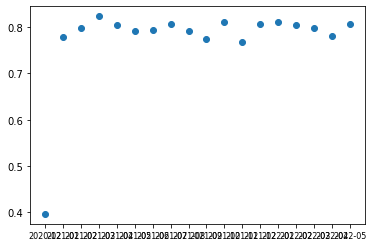

In [38]:
plt.tick_params(axis='x', which='major', labelsize=8)
plt.scatter(time_period[16:34], monthly_complete_18plus[16:34])

### In ny data, there's constant positive association beteween price and Series_Complete_18Plus, and stable correlation between price and metro_status

In [39]:
ca_corr_dict = dict()
for time in time_period:
    yearly_corr = list()
    ca_merged_month = ca_merged_drop_booster.loc[ca_merged_drop_booster['Date'] == time]
    ca_merged_month.sort_values(by='Location')
    price_complete_pop_pct_corr =  ca_merged_month['Price'].corr(ca_merged_month['Series_Complete_Pop_Pct'])
    yearly_corr.append(price_complete_pop_pct_corr)
    price_18Plus = ca_merged_month['Price'].corr(ca_merged_month['Series_Complete_18Plus'])
    yearly_corr.append(price_18Plus)
    price_SVI_CTGY = ca_merged_month['Price'].corr(ca_merged_month['SVI_CTGY'])
    yearly_corr.append(price_SVI_CTGY)
    price_Metro_status = ca_merged_month['Price'].corr(ca_merged_month['Metro_status'])
    yearly_corr.append(price_Metro_status)
    ca_corr_dict[time] = yearly_corr
# ca_corr_dict

In [42]:
print("{:<8} {:<20} {:<20} {:<20} {:<20}".format('Time','Series_Complete_Pop_Pct','Series_Complete_18Plus', 'SVI_CTGY', 'Metro_status'))
for k, v in ca_corr_dict.items():
    if k > '2020-12':
        Series_Complete_Pop_Pct, Series_Complete_18Plus, SVI_CTGY, Metro_status= v
        print("{:<8} {:<20} {:<20} {:<20} {:<20}".format(k, Series_Complete_Pop_Pct, Series_Complete_18Plus, SVI_CTGY, Metro_status))

Time     Series_Complete_Pop_Pct Series_Complete_18Plus SVI_CTGY             Metro_status        
2021-01  0.4052682541406023   0.23964319231864648  -0.4935483247019654  0.35070906092941817 
2021-02  0.2793671971920262   0.17919446486944252  -0.4995376180059725  0.3038599800632482  
2021-03  0.32311968534823005  0.20561198771217448  -0.5159630595861411  0.2935079000694556  
2021-04  0.5491056118804419   0.2381582897536364   -0.4822172186576196  0.3669747135218284  
2021-05  0.6172974564667575   0.236088005085476    -0.4796147335087037  0.3416870723964635  
2021-06  0.6753200309849785   0.2653683576695768   -0.4683306977418068  0.37288561477981896 
2021-07  0.661174402517947    0.2677766690589233   -0.45720605552777305 0.36672343523163875 
2021-08  0.6381738091138626   0.2787445810409337   -0.46879850815582697 0.3890110816747431  
2021-09  0.5962043010505693   0.2866778360631327   -0.45579969111957813 0.384034806868661   
2021-10  0.5500292840052527   0.2749832553037752   -0.45379277789

### In CA data, the correlaiton between price and Series_Complete_18Plus is not as strong as that in NY, instead price has increasing correlation with Series_Complete_Pop_Pct, metro_status has similar correlation as in NY

In [41]:
unemployment_ca= pd.read_csv("part1/ca_counties_unemployment_rate.csv",index_col = 0)
unemployment_ca2= unemployment_ca.reset_index()
unemployment_ca_d1 = unemployment_ca2.melt(id_vars = "DATE",var_name = "COUNTY", value_name = "Unemployment_Rate")
unemployment_ca_d1['DATE'] = pd.to_datetime(unemployment_ca_d1['DATE'], format='%Y-%m-%d')
unemployment_ca_d1['DATE'] = unemployment_ca_d1['DATE'].dt.strftime('%Y-%m')

In [42]:
ca_all_df = pd.DataFrame()

for i in range(len(ca_all.columns)):
    curr = pd.DataFrame([ca_all.columns[i]+ ' County' for x in range(len(ca_all.index))],index = ca_all.index,columns =['COUNTY'])
    curr['Price'] = [ca_all.iloc[x,i] for x in range(len(ca_all.index))]
    ca_all_df = pd.concat([curr, ca_all_df])

ca_all_df = ca_all_df.reset_index().rename(columns ={'Time':'DATE'})

ca_merged1 = pd.merge(ca_all_df,unemployment_ca_d1, on =['DATE','COUNTY'], how= 'right')

# ca_merged1

In [43]:
unemployment_ny= pd.read_csv("part1/ny_counties_unemployment_rate.csv",index_col = 0)
unemployment_ny2= unemployment_ny.reset_index()
unemployment_ny_d1 = unemployment_ny2.melt(id_vars = "DATE",var_name = "COUNTY", value_name = "Unemployment_Rate")
unemployment_ny_d1['DATE'] = pd.to_datetime(unemployment_ny_d1['DATE'], format='%Y-%m-%d')
unemployment_ny_d1['DATE'] = unemployment_ny_d1['DATE'].dt.strftime('%Y-%m')
unemployment_ny_d1
ny_all_df = pd.DataFrame()

for i in range(len(ny_all.columns)):
    curr = pd.DataFrame([ny_all.columns[i]+ ' County' for x in range(len(ny_all.index))],index = ny_all.index,columns =['COUNTY'])
    curr['Price'] = [ny_all.iloc[x,i] for x in range(len(ny_all.index))]
    ny_all_df = pd.concat([curr, ny_all_df])

ny_all_df = ny_all_df.reset_index().rename(columns ={'Time':'DATE'})

ny_merged1 = pd.merge(ny_all_df,unemployment_ny_d1, on =['DATE','COUNTY'], how= 'right')
ny_merged1.dropna(inplace = True)
ny_merged1.head()

,DATE,COUNTY,Price,Unemployment_Rate
35,2019-08,Allegany County,"$93,500",5.2
36,2019-09,Allegany County,"$112,000",4.3
37,2019-10,Allegany County,"$95,000",4.5
38,2019-11,Allegany County,"$120,450",5.1
39,2019-12,Allegany County,"$84,000",5.7


In [44]:
inventory_ca= pd.read_csv("part1/inventory_ca.csv",index_col = 0)
inventory_ca2= inventory_ca.reset_index()
inventory_ca_d1 = inventory_ca2.melt(id_vars = "DATE",var_name = "COUNTY", value_name = "inventory")
inventory_ca_d1['DATE'] = pd.to_datetime(inventory_ca_d1['DATE'], format='%Y-%m-%d')
inventory_ca_d1['DATE'] = inventory_ca_d1['DATE'].dt.strftime('%Y-%m')
ca_merge2 = ca_merged1.merge(inventory_ca_d1,on=['DATE','COUNTY'])
inventory_ny= pd.read_csv("part1/inventory_ny.csv",index_col = 0)
inventory_ny2= inventory_ny.reset_index()
inventory_ny_d1 = inventory_ny2.melt(id_vars = "DATE",var_name = "COUNTY", value_name = "inventory")
inventory_ny_d1['DATE'] = pd.to_datetime(inventory_ny_d1['DATE'], format='%Y-%m-%d')
inventory_ny_d1['DATE'] = inventory_ny_d1['DATE'].dt.strftime('%Y-%m')
ny_merge2 = ny_merged1.merge(inventory_ny_d1,on=['DATE','COUNTY'])

In [45]:
mortgage= pd.read_csv("part1/mortgage.csv")
mortgage['DATE'] = pd.to_datetime(mortgage['DATE'], format='%Y-%m-%d')
mortgage['DATE'] = mortgage['DATE'].dt.strftime('%Y-%m')
ca_merge3 = ca_merge2.merge(mortgage,on=['DATE'])
ny_merge3 = ny_merge2.merge(mortgage,on=['DATE'])

In [46]:
ny_merge3 = ny_merge3.rename(columns={'COUNTY': 'Location', 'DATE' : 'Date'})

In [47]:
ca_merge3.drop('Price', axis=1, inplace=True)
ca_merge3 = ca_merge3.rename(columns={'COUNTY': 'Location', 'DATE' : 'Date'})

In [50]:
ny_merged_drop_booster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 0 to 1133
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           864 non-null    object 
 1   Location                       864 non-null    object 
 2   Price                          864 non-null    int64  
 3   Completeness_pct               864 non-null    float64
 4   Series_Complete_Yes            864 non-null    float64
 5   Series_Complete_Pop_Pct        864 non-null    float64
 6   Series_Complete_18Plus         864 non-null    float64
 7   Series_Complete_18PlusPop_Pct  864 non-null    float64
 8   SVI_CTGY                       864 non-null    int64  
 9   Metro_status                   864 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 74.2+ KB


In [48]:
ny_merge3.drop('Price', axis=1, inplace=True)
ny_merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1224
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1225 non-null   object 
 1   Location           1225 non-null   object 
 2   Unemployment_Rate  1225 non-null   float64
 3   inventory          1225 non-null   int64  
 4   Mortgage           1225 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 57.4+ KB


In [49]:
ny_combined = ny_merged_drop_booster.merge(ny_merge3, on=["Date", "Location"])

In [50]:
ca_combined = ca_merged_drop_booster.merge(ca_merge3, on=["Date", "Location"])

## Granger-Causality Test

In [56]:
from statsmodels.tsa.stattools import grangercausalitytests

### Use the grangercausalitytests() function from the statsmodels package to perform a Granger-Causality test in Python. 
### Null Hypothesis (H0): Time series Series_Complete_18Plus does not Granger-cause time series Price

In [52]:
ny_combined.head()

,Date,Location,Price,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,SVI_CTGY,Metro_status,Unemployment_Rate,inventory,Mortgage
0,2022-05,Wayne County,200000,97.6,56658.0,63.0,50790.0,71.7,1,1,2.7,82,5.27
1,2022-05,Broome County,169000,97.6,121961.0,64.0,110823.0,72.1,2,1,3.3,237,5.27
2,2022-05,Cayuga County,171450,97.6,45566.0,59.5,41183.0,66.8,2,0,3.0,97,5.27
3,2022-05,Chautauqua County,151750,97.6,75910.0,59.8,68836.0,68.0,2,0,3.4,144,5.27
4,2022-05,Oneida County,174900,97.6,144636.0,63.3,130436.0,72.5,2,1,3.2,227,5.27


In [60]:
ny_unique_county = sorted(ny_combined['Location'].unique())

In [59]:
for county in ny_unique_county:
    ny_combined_sub = ny_combined.loc[(ny_combined['Location'] == county) & (ny_combined['Date'].isin(covid_time_period))].sort_values(by='Date')
    print(f'\nShowing granger causality for {county}')
    grangercausalitytests(ny_combined_sub[['Series_Complete_18PlusPop_Pct', 'Price']], maxlag=[3])


Showing granger causality for Bronx County

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4125  , p=0.3172  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=8.4750  , p=0.0371  , df=3
likelihood ratio test: chi2=6.6269  , p=0.0848  , df=3
parameter F test:         F=1.4125  , p=0.3172  , df_denom=7, df_num=3

Showing granger causality for Broome County

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2211  , p=0.1733  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=13.3265 , p=0.0040  , df=3
likelihood ratio test: chi2=9.3632  , p=0.0248  , df=3
parameter F test:         F=2.2211  , p=0.1733  , df_denom=7, df_num=3

Showing granger causality for Cattaraugus County

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6144  , p=0.6271  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=3.6863  , p=0.2974  , df=3
likelihood ratio test: chi2=3.2723  , p=0.3515  , df=3
parameter F test:         F=0.6144  , 

### From the above granger-causality output, we can tell Columbia County, Erie County, Monroe County, Onondaga County, Ontario County, Ostego County, Tomkins County have p-value less than .05, we can reject the null hypothesis of the test and conclude that for these counties, Series_Complete_18PlusPop_Pct is usedful for predicting housing price

In [64]:
ca_combined.head()

,Date,Location,Price,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,SVI_CTGY,Metro_status,Unemployment_Rate,inventory,Mortgage
0,2022-05,Sacramento County,580000,97.6,1057537.0,68.1,921208.0,77.5,2,1,3.1,1470,5.27
1,2022-05,Mendocino County,597500,97.6,59067.0,68.1,53885.0,78.7,3,0,2.9,292,5.27
2,2022-05,Santa Clara County,1927500,97.6,1671066.0,86.7,1430099.0,94.6,1,1,3.6,1415,5.27
3,2022-05,Butte County,500000,97.6,118494.0,54.1,108229.0,61.9,3,1,3.4,370,5.27
4,2022-05,Placer County,735000,97.6,271009.0,68.0,238645.0,76.9,0,1,2.1,815,5.27


In [69]:
ca_unique_county = sorted(ca_combined['Location'].unique())

for county in ca_unique_county:
    ca_combined_sub = ca_combined.loc[(ca_combined['Location'] == county) & (ca_combined['Date'].isin(covid_time_period))].sort_values(by='Date')
    print(f'\nShowing granger causality for {county}')
    grangercausalitytests(ca_combined_sub[['Series_Complete_18PlusPop_Pct', 'Price']], maxlag=[3])


Showing granger causality for Alameda County

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8843  , p=0.4942  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=5.3060  , p=0.1507  , df=3
likelihood ratio test: chi2=4.4990  , p=0.2124  , df=3
parameter F test:         F=0.8843  , p=0.4942  , df_denom=7, df_num=3

Showing granger causality for Butte County

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.1100  , p=0.0563  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=24.6601 , p=0.0000  , df=3
likelihood ratio test: chi2=14.2205 , p=0.0026  , df=3
parameter F test:         F=4.1100  , p=0.0563  , df_denom=7, df_num=3

Showing granger causality for El Dorado County

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0157  , p=0.9971  , df_denom=7, df_num=3
ssr based chi2 test:   chi2=0.0942  , p=0.9925  , df=3
likelihood ratio test: chi2=0.0938  , p=0.9926  , df=3
parameter F test:         F=0.0157  , p

### From the above granger-causality output, we can tell Butte County and Orange County have p-value less than .05, we can reject the null hypothesis of the test and conclude that for these counties, Series_Complete_18PlusPop_Pct is usedful for predicting housing price

## Model Prediction

In [71]:
ny_combined_numeric_county = ny_combined

ny_combined_numeric_county['Location'].replace(to_replace=ny_unique_county,
           value= list(range(len(ny_unique_county))), inplace=True)
ny_combined_numeric_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 629
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           630 non-null    object 
 1   Location                       630 non-null    int64  
 2   Price                          630 non-null    int32  
 3   Completeness_pct               630 non-null    float64
 4   Series_Complete_Yes            630 non-null    float64
 5   Series_Complete_Pop_Pct        630 non-null    float64
 6   Series_Complete_18Plus         630 non-null    float64
 7   Series_Complete_18PlusPop_Pct  630 non-null    float64
 8   SVI_CTGY                       630 non-null    int64  
 9   Metro_status                   630 non-null    int32  
 10  Unemployment_Rate              630 non-null    float64
 11  inventory                      630 non-null    int64  
 12  Mortgage                       630 non-null    flo

In [98]:
ca_unique_county = sorted(ca_combined['Location'].unique())
ca_combined_numeric_county = ca_combined

ca_combined_numeric_county['Location'].replace(to_replace=ca_unique_county,
           value= list(range(len(ca_unique_county))), inplace=True)
ca_combined_numeric_county.head()

,Date,Location,Price,Completeness_pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,SVI_CTGY,Metro_status,Unemployment_Rate,inventory,Mortgage
0,2022-05,19,580000,97.6,1057537.0,68.1,921208.0,77.5,2,1,3.1,1470,5.27
1,2022-05,11,597500,97.6,59067.0,68.1,53885.0,78.7,3,0,2.9,292,5.27
2,2022-05,26,1927500,97.6,1671066.0,86.7,1430099.0,94.6,1,1,3.6,1415,5.27
3,2022-05,1,500000,97.6,118494.0,54.1,108229.0,61.9,3,1,3.4,370,5.27
4,2022-05,17,735000,97.6,271009.0,68.0,238645.0,76.9,0,1,2.1,815,5.27


### SVR

### Train with data prior 2022-05, test accuracy with 2022-05 as actual

#### NY

In [78]:
X_train_ny = ny_combined_numeric_county[ny_combined_numeric_county['Date'] != '2022-05']
X_train_ny.shape

(595, 13)

In [79]:
y_train_ny = X_train_ny['Price']

In [80]:
X_train_ny.drop(['Date', 'Price'], axis=1, inplace=True)

In [81]:
X_test_ny = ny_combined_numeric_county[ny_combined_numeric_county['Date'] == '2022-05']

In [83]:
X_test_ny.shape

(35, 13)

In [84]:
y_actual_ny = X_test_ny['Price']

In [87]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=10, C=1.5, epsilon=0.5)).fit(X_train_ny, y_train_ny)

In [92]:
X_test_ny.drop(['Date', 'Price'], axis=1, inplace=True)

In [93]:
y_predict_ny = svr.predict(X_test_ny)

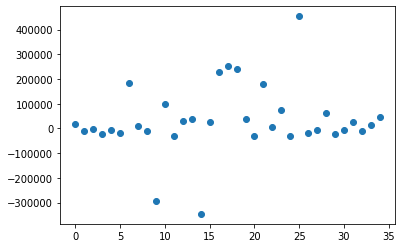

In [95]:
plt.plot(y_actual_ny - y_predict_ny,marker='o',linestyle='')
# plt.savefig('diff.png')

In [97]:
from sklearn.metrics import r2_score
r2_score(y_actual_ny, y_predict_ny)

0.3665829455106905

#### CA

In [107]:
X_train_ca = ca_combined_numeric_county[ca_combined_numeric_county['Date'] != '2022-05']
y_train_ca = X_train_ca['Price']
X_train_ca.drop(['Date', 'Price'], axis=1, inplace=True)

X_test_ca = ca_combined_numeric_county[ca_combined_numeric_county['Date'] == '2022-05']
y_actual_ca = X_test_ca['Price']
X_test_ca.drop(['Date', 'Price'], axis=1, inplace=True)

svr_ca= make_pipeline(StandardScaler(), SVR(kernel='poly', degree=10, C=1.5, epsilon=0.5)).fit(X_train_ca, y_train_ca)
y_predict_ca = svr_ca.predict(X_test_ca)
r2_score(y_actual_ca, y_predict_ca)

-0.41738774939473644

### Stacking ensemble method

In [120]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression, LassoCV
from vecstack import stacking

#### NY

In [122]:
estimators = [('LinearRegression', LinearRegression()),('lasso', LassoCV(random_state=42)),('xgb', xgb.XGBRegressor())]

In [124]:
final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,random_state=42)
reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
reg.fit(X_train_ny, y_train_ny)
y_pred_ny = reg.predict(X_test_ny)
r2_score(y_actual_ny, y_pred_ny)

0.9240125866746173

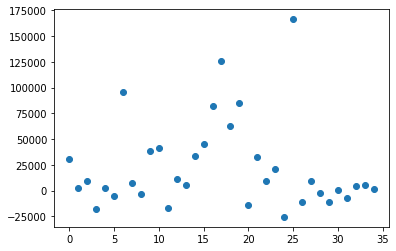

In [126]:
plt.plot(y_actual_ny - y_pred_ny,marker='o',linestyle='')

### CA

In [125]:
reg.fit(X_train_ca, y_train_ca)
y_pred_ca = reg.predict(X_test_ca)
r2_score(y_actual_ca, y_pred_ca)

0.7763712449750523

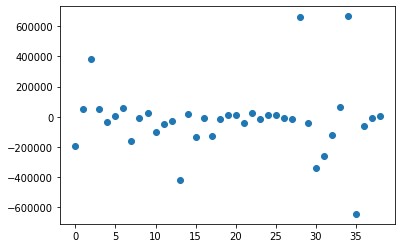

In [127]:
plt.plot(y_actual_ca - y_pred_ca,marker='o',linestyle='')